Loan SARAZIN & Anna MARIZY

# Simulations de Variables Aléatoires

## Générateur fondé sur l’inverse généralisée

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as ss
#from scipy.stats import uniform
#from scipy.stats import expon

In [44]:
def generalized_inverse(invF, n) :
    """Génère un échantillon de variables aléatoires selon la densité f = invF en utilisant l'inverse généralisé
    
    Args:
        invF (IDK): Inverse de la fonction de répartition
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    u = ss.uniform.rvs(loc=0, scale=1, size=n)
    return invF(u)

Soit $X$ une variable aléatoire suivant une loi exponentielle de paramètre $\lambda$. Sa fonction de répartition est :
$$F(x)=1-\exp(-\lambda x)$$
L'inverse généralisé de $F$ est :
$$F^{-1}(u)=-\frac{1}{\lambda}\ln(1-u)$$

In [45]:
def invExp(u, Lambda) :
    return -np.log(1-u)/Lambda

Lambda = 2
nbEchantillon = 10000

x = generalized_inverse(lambda x : invExp(x, Lambda), nbEchantillon)

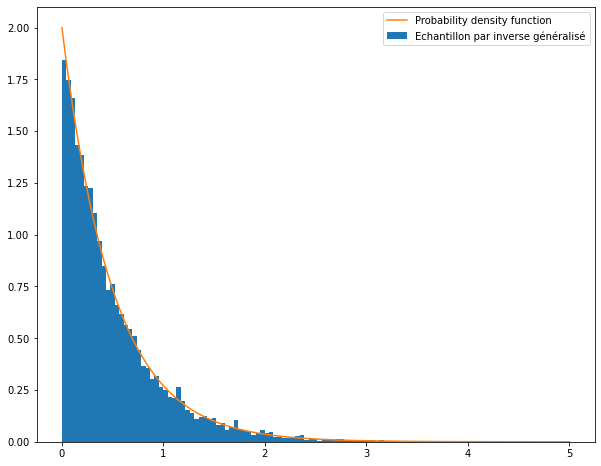

In [46]:
t = np.linspace(0, 5, 1000)
z = ss.expon.pdf(t, loc=0, scale=1/Lambda)

plt.figure(figsize=(10, 8))
plt.hist(x, bins=100, density=True, label='Echantillon par inverse généralisé')
plt.plot(t, z, label='Probability density function')
plt.legend()
plt.show()

Pour utiliser cet algorithme, il faut connaitre l'inverse généralisé de la fonction de répartition $F$, afin de générer
échantillon selon la densité $f(x)=F'(x)$.  
En pratique il n'est pas souvent possible d'accéder à cet inverse généralisé.

## Générateur Accept-Reject

In [47]:
def acceptReject(f, g, M, n) :
    """
    Génère un échantillon de variables aléatoires selon la densité f = invF en utilisant l'inverse généralisé
    
    Args:
        f (IDK) :
        g (IDK) :
        M (float) :
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    X = []
    for k in range(n) :
        u = ss.uniform.rvs(loc=0, scale=1)
        x = g

In [79]:
nbEchantillon = 10000
M = 5
X = np.zeros(shape=nbEchantillon)

In [85]:
k = 0
for i in range(nbEchantillon) :
    u = ss.uniform.rvs(loc=0, scale=1)
    x = ss.cauchy.rvs(loc=0, scale=1)
    while (ss.norm.pdf(x, loc=0, scale=1)/(M*ss.cauchy.pdf(x, loc=0, scale=1))) < u :
        u = ss.uniform.rvs(loc=0, scale=1)
        x = ss.cauchy.rvs(loc=0, scale=1)
        k += 1
    X[i] = x

In [86]:
k

40777

Regarder combien de valeur sont rejetées. Nous ne gardons pas en mémoire les valeurs rejetées.

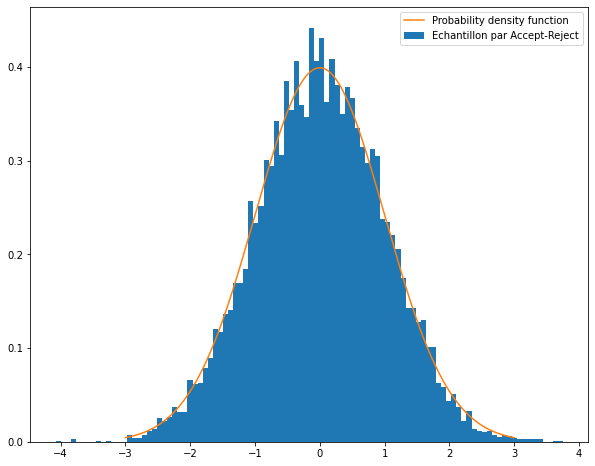

In [82]:
t = np.linspace(-3, 3, 1000)
z = ss.norm.pdf(t, loc=0, scale=1)

plt.figure(figsize=(10, 8))
plt.hist(X, bins=100, density=True, label='Echantillon par Accept-Reject')
plt.plot(t, z, label='Probability density function')
plt.legend()
plt.show()

S'arrêter à l'algorithme de Metropolis-Hastings